In [47]:
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True
False
True
True


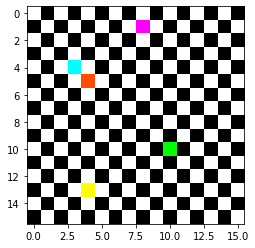

In [65]:
class Board:
    def __init__(self):
        self.attacking_queens = []
        self.grid = np.zeros((16,16,3),np.float64)
        for row in range(16):
            for col in range(16):
                if (not col % 2 and not row % 2) or ( col % 2 and  row % 2) :
                    self.grid[row,col] = (1,1,1)
        
    
    def add_red (self,row,col):
        self.grid[row,col]=(1,.3,0)
        self.red =[row,col]

    def add_blue (self,row,col):
        self.grid[row,col]=(0,1,1) 
        self.blue =[row,col]
        self.attacking_queens.append(self.blue)

    def add_green (self,row,col):
        self.grid[row,col]=(0,1,0)
        self.green =[row,col]
        self.attacking_queens.append(self.green)

    def add_purple (self,row,col):
        self.grid[row,col]=(2,0,2)
        self.purple =[row,col]
        self.attacking_queens.append(self.purple)

    def add_yellow (self,row,col):
        self.grid[row,col]=(3,6,0)
        self.yellow =[row,col]
        self.attacking_queens.append(self.yellow)
    
    def render(self):
        plt.imshow(self.grid)

    def is_under_attack(self,queen):
        if self.red[0] == queen[0] or self.red[1] == queen[1]:
            return True
        elif abs(self.red[0]-queen[0]) == abs(self.red[1]-queen[1]):
            return True
        else :
            return False


board = Board()
board.add_red(5,4)
board.add_blue(4,3)
board.add_green(10,10)
board.add_purple(1,8)
board.add_yellow(13,4)
board.render()

for i in board.attacking_queens:
  print(board.is_under_attack(i))

   



In [56]:
def test_on_same_row():
    expected = True

    board = Board()
    board.add_blue(5,4)
    board.add_red(5,3)
    actual = board.is_under_attack(board.blue)

    assert actual == expected

def test_on_same_col():
    expected = True

    board = Board()
    board.add_green(10,10)
    board.add_red(5,10)
    actual = board.is_under_attack(board.yellow)

    assert actual == expected

def test_on_same_diagonal():
    expected = True

    board = Board()
    board.add_red(5,4)
    board.add_purple(4,8)
    actual = board.is_under_attack(board.purple)

    assert actual == expected

def test_not_under_attack():
    expected = False

    board = Board()
    board.add_red(9,5)
    board.add_blue(4,3)
    actual = board.is_under_attack(board.blue)

    assert actual == expected
